## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    "./Resources/bitstamp.csv",
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    "./Resources/coinbase.csv",
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
 
bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '')


<ipython-input-7-0e466e7f8f34>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '')


In [8]:
bitstamp_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,6928.01,0.209363,1450.735763,6929.289993


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp_df["Close"] = bitstamp_df["Close"].astype("float")
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [10]:
bitstamp_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [13]:
# Use the str.replace function to remove the dollar sign, $
 
coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '')

<ipython-input-13-28cbb2b7a94b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '')


In [14]:
# Convert the Close data type to a float
coinbase_df["Close"] = coinbase_df["Close"].astype("float")
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [15]:
coinbase_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

In [16]:
# Review the data for duplicate values, and drop them if necessary
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.iloc[:,[3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [19]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_df.describe(include='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [20]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_df.describe(include='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'bitstamp'}, xlabel='Timestamp'>

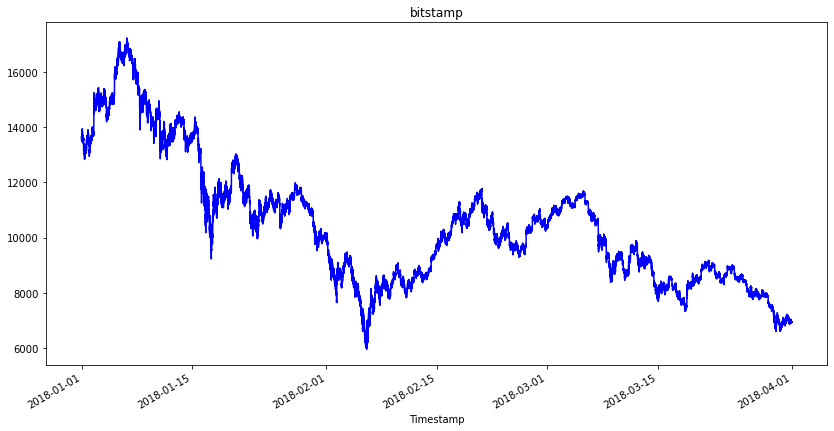

In [21]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title and color are tailored to each visualization
bitstamp_df['Close'].plot.line(figsize=(14,7), color="blue", title="bitstamp")

<AxesSubplot:title={'center':'coinbase'}, xlabel='Timestamp'>

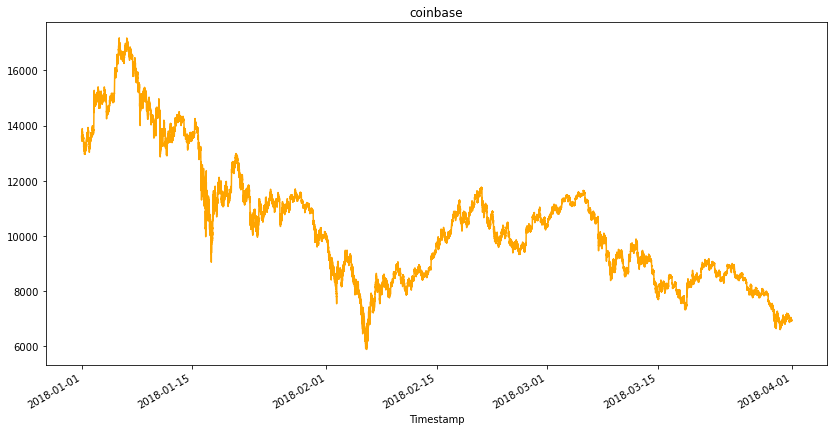

In [22]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_df['Close'].plot.line(figsize=(14,7), color="orange", title="coinbase")

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df'}, xlabel='Timestamp'>

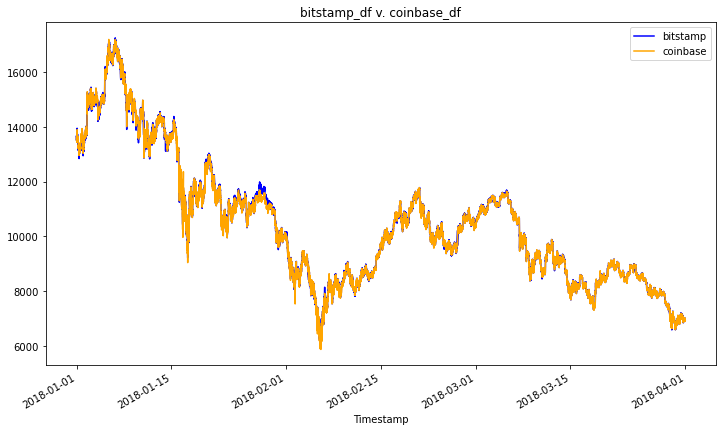

In [23]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_df['Close'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_df", color="blue", label="bitstamp")
coinbase_df['Close'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df'}, xlabel='Timestamp'>

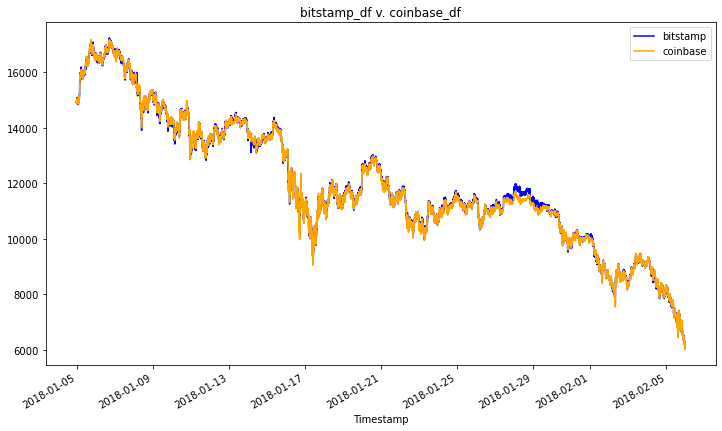

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df['Close'].loc['2018-01-05' : '2018-02-05'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_df", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-01-05' : '2018-02-05'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

In [25]:
#

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df'}, xlabel='Timestamp'>

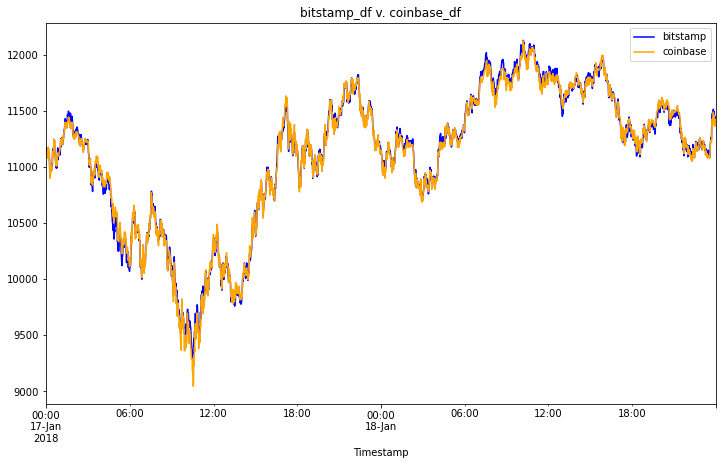

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-01-17' : '2018-01-18'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_df", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-01-17' : '2018-01-18'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

In [27]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_df['Close'].loc['2018-01-17'] - bitstamp_df['Close']
arbitrage_spread_early.describe()

# Generate summary statistics for the early DataFrame

count    1440.000000
mean       -0.291097
std        46.607831
min      -205.410000
25%       -24.427500
50%         0.010000
75%        25.995000
max       190.220000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 17, 2018'}, xlabel='Timestamp'>

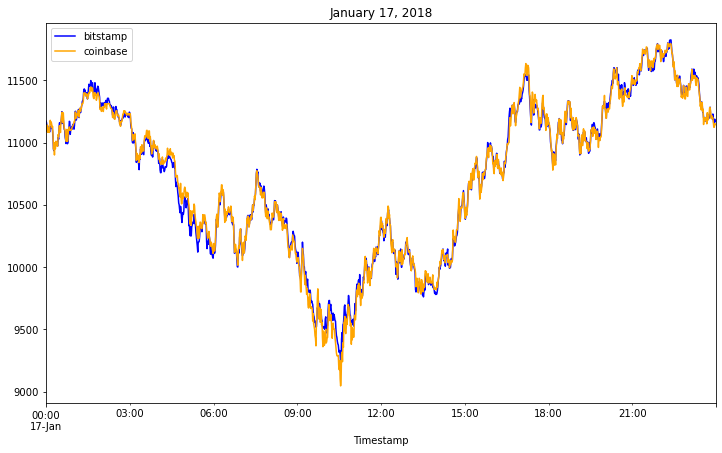

In [28]:
# Visualize the arbitrage spread from early in the dataset in a box plot
bitstamp_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), title= "January 17, 2018", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:>

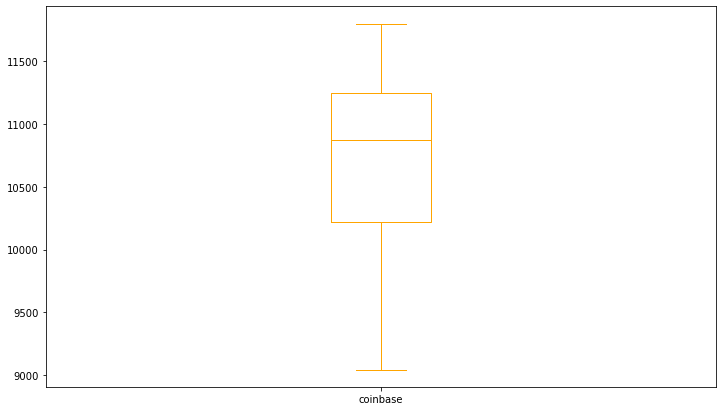

In [67]:
# Visualize the arbitrage spread from early in the dataset in a box plot
#bitstamp_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), title= "January 17, 2018", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), kind = "box", color="orange", label="coinbase")

<AxesSubplot:title={'center':'January 17, 2018'}>

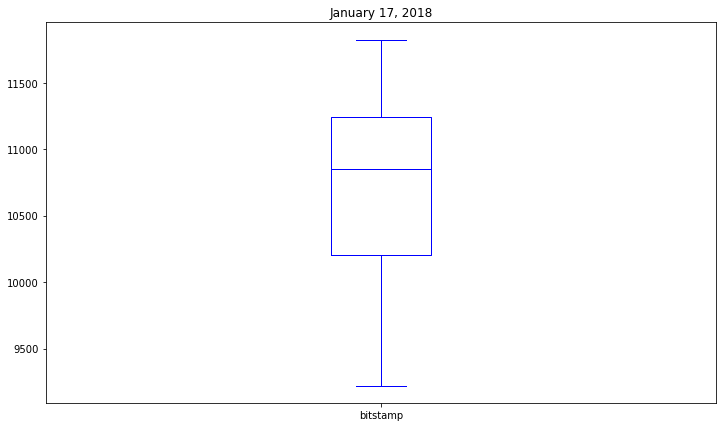

In [66]:
# Visualize the arbitrage spread from early in the dataset in a box plot
bitstamp_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), kind="box", title= "January 17, 2018", color="blue", label="bitstamp")
#coinbase_df['Close'].loc['2018-01-17'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df'}, xlabel='Timestamp'>

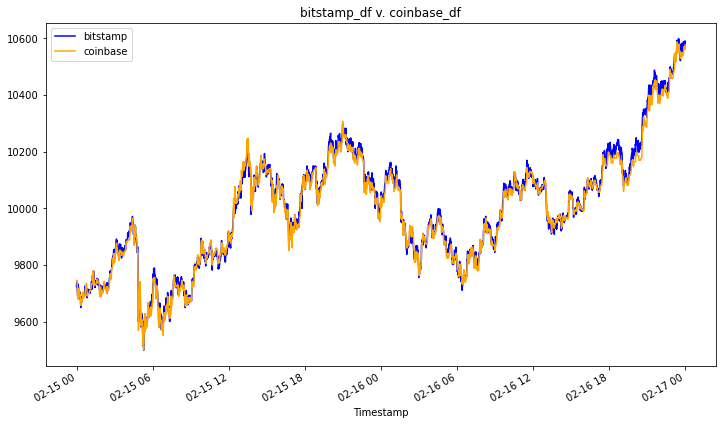

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-02-15': '2018-02-16'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_df", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-02-15': '2018-02-16'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

In [30]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_df['Close'].loc['2018-02-15'] - bitstamp_df['Close']
arbitrage_spread_middle.describe()


# Generate summary statistics for the midlle dataframe 

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'February 15, 2018'}>

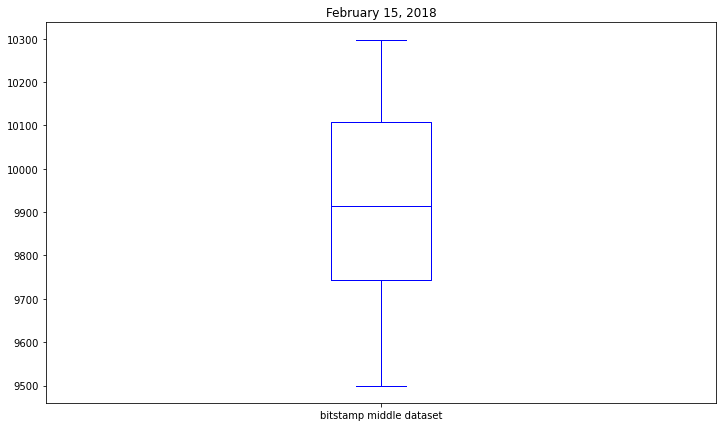

In [70]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
bitstamp_df['Close'].loc['2018-02-15'].plot(legend=True, kind="box", figsize=(12, 7), title="February 15, 2018", color="blue", label="bitstamp middle dataset")
#coinbase_df['Close'].loc['2018-02-15'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:>

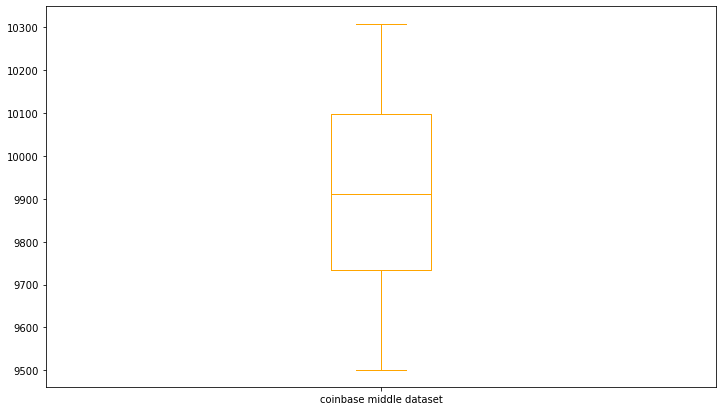

In [71]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
#bitstamp_df['Close'].loc['2018-02-15'].plot(legend=True, figsize=(12, 7), title="February 15, 2018", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-02-15'].plot(legend=True, kind="box", figsize=(12, 7), color="orange", label="coinbase middle dataset")

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df'}, xlabel='Timestamp'>

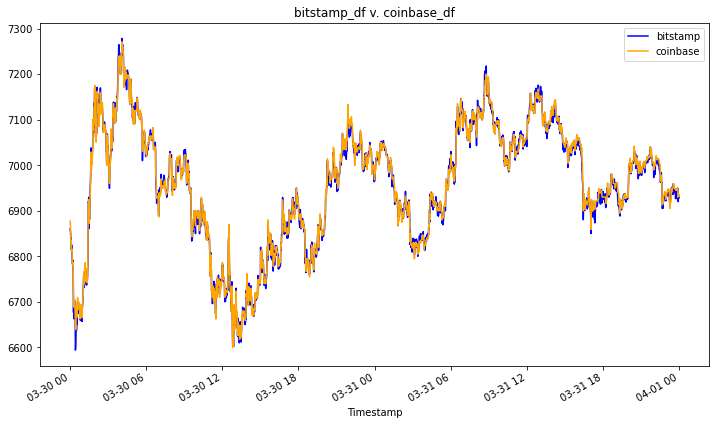

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-03-30' : '2018-03-31'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_d f", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-03-30' : '2018-03-31'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'bitstamp_df v. coinbase_df 1 day trade'}, xlabel='Timestamp'>

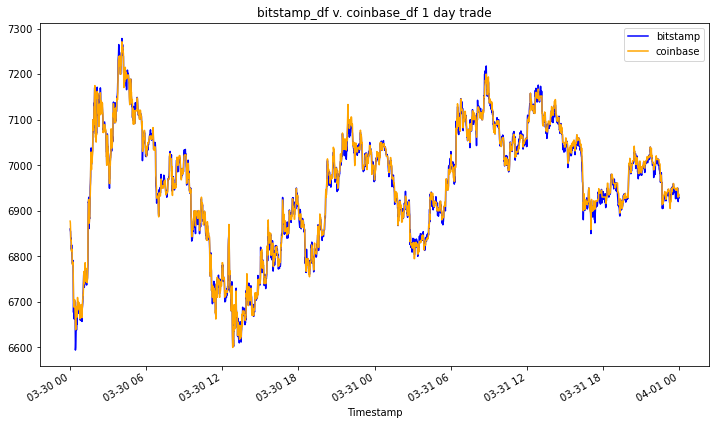

In [72]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-03-30' : '2018-03-31'].plot(legend=True, figsize=(12, 7), title="bitstamp_df v. coinbase_df 1 day trade" , color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-03-30' : '2018-03-31'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

In [33]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_df['Close'].loc['2018-03-30'] - bitstamp_df['Close']
arbitrage_spread_late.describe()

# Generate summary statistics for the late DataFrame

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread Mar 30, 2018 '}>

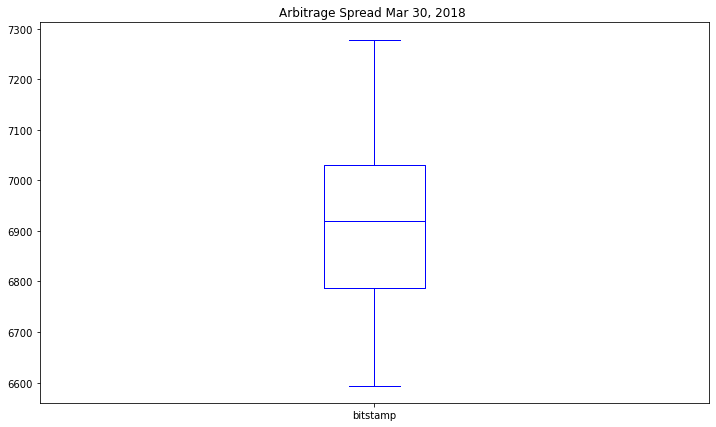

In [74]:
# Visualize the arbitrage spread from late in the dataset in a box plot
bitstamp_df['Close'].loc['2018-03-30'].plot(legend=True, kind="box", figsize=(12, 7),  title="Arbitrage Spread Mar 30, 2018 ", color="blue", label="bitstamp")
#coinbase_df['Close'].loc['2018-03-30'].plot(legend=True, figsize=(12, 7), color="orange", label="coinbase")

<AxesSubplot:title={'center':'Arbitrage Spread Mar 30, 2018'}>

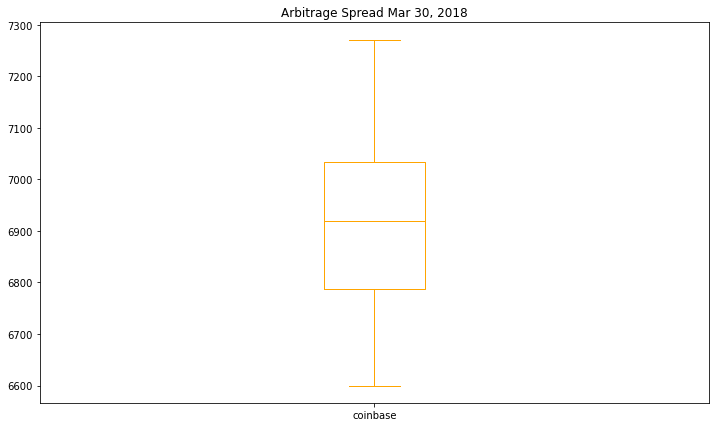

In [75]:
# Visualize the arbitrage spread from late in the dataset in a box plot
#bitstamp_df['Close'].loc['2018-03-30'].plot(kind="box", legend=True, figsize=(12, 7), title="March 30, 2018", color="blue", label="bitstamp")
coinbase_df['Close'].loc['2018-03-30'].plot(legend=True, kind="box", figsize=(12, 7), title="Arbitrage Spread Mar 30, 2018", color="orange", label="coinbase")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [36]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = coinbase_df['Close'].loc['2018-01-17'] - bitstamp_df['Close'].loc['2018-01-17']
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.291097
std        46.607831
min      -205.410000
25%       -24.427500
50%         0.010000
75%        25.995000
max       190.220000
Name: Close, dtype: float64

In [37]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early>.01]
profitable_trades_early.head()

Timestamp
2018-01-17 00:03:00     7.09
2018-01-17 00:08:00    31.33
2018-01-17 00:09:00    53.10
2018-01-17 00:10:00    26.91
2018-01-17 00:11:00    31.81
Name: Close, dtype: float64

In [38]:
# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_early.describe()

count    723.000000
mean      33.601701
std       29.109595
min        0.010000
25%       12.940000
50%       25.910000
75%       46.005000
max      190.220000
Name: Close, dtype: float64

In [39]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle = coinbase_df['Close'].loc['2018-02-15'] - bitstamp_df['Close'].loc['2018-02-16']
arbitrage_spread_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [76]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle >.01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [41]:
# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [42]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late = coinbase_df['Close'].loc['2018-03-30'] - bitstamp_df['Close'].loc['2018-03-31']
arbitrage_spread_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [43]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_late = arbitrage_spread_late[arbitrage_spread_late >.01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

In [44]:
# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [45]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_df['Close'].loc["2018-01-17"]

spread_return_early.describe()

count    7.230000e+02
mean     3.152965e-03
std      2.788697e-03
min      8.771938e-07
25%      1.220434e-03
50%      2.416540e-03
75%      4.272434e-03
max      1.828342e-02
Name: Close, dtype: float64

In [46]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_df['Close'].loc["2018-02-15"]

spread_return_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [47]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_df['Close'].loc["2018-03-30"]

spread_return_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [48]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early >.01]

# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-17 00:03:00     7.09
2018-01-17 00:08:00    31.33
2018-01-17 00:09:00    53.10
2018-01-17 00:10:00    26.91
2018-01-17 00:11:00    31.81
Name: Close, dtype: float64

In [49]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle >.01]

# Review the first five profitable trades
profitable_trades_middle.head(5)

Series([], Name: Close, dtype: float64)

In [50]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = arbitrage_spread_late[arbitrage_spread_late >.01]

# Review the first five profitable trades
profitable_trades_late.head(5)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [51]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early >.01]
profitable_trades_early.describe()

count    723.000000
mean      33.601701
std       29.109595
min        0.010000
25%       12.940000
50%       25.910000
75%       46.005000
max      190.220000
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [52]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_df['Close'].loc['2018-01-17']
profit_early


Timestamp
2018-01-17 00:00:00          NaN
2018-01-17 00:01:00          NaN
2018-01-17 00:02:00          NaN
2018-01-17 00:03:00    78932.261
2018-01-17 00:04:00          NaN
                         ...    
2018-01-17 23:55:00          NaN
2018-01-17 23:56:00          NaN
2018-01-17 23:57:00          NaN
2018-01-17 23:58:00          NaN
2018-01-17 23:59:00          NaN
Name: Close, Length: 1440, dtype: float64

In [53]:
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early.describe()

count    7.230000e+02
mean     3.589706e+05
std      3.059126e+05
min      1.110000e+02
25%      1.407675e+05
50%      2.780358e+05
75%      4.990549e+05
max      1.979041e+06
Name: Close, dtype: float64

In [54]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_middle = profitable_trades_middle * bitstamp_df['Close'].loc['2018-02-15']
profit_middle

Timestamp
2018-02-15 00:00:00   NaN
2018-02-15 00:01:00   NaN
2018-02-15 00:02:00   NaN
2018-02-15 00:03:00   NaN
2018-02-15 00:04:00   NaN
                       ..
2018-02-15 23:55:00   NaN
2018-02-15 23:56:00   NaN
2018-02-15 23:57:00   NaN
2018-02-15 23:58:00   NaN
2018-02-15 23:59:00   NaN
Name: Close, Length: 1440, dtype: float64

In [55]:
# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [56]:
profit_late = profitable_trades_late * bitstamp_df['Close'].loc['2018-03-30']
profit_late

Timestamp
2018-03-30 00:00:00   NaN
2018-03-30 00:01:00   NaN
2018-03-30 00:02:00   NaN
2018-03-30 00:03:00   NaN
2018-03-30 00:04:00   NaN
                       ..
2018-03-30 23:55:00   NaN
2018-03-30 23:56:00   NaN
2018-03-30 23:57:00   NaN
2018-03-30 23:58:00   NaN
2018-03-30 23:59:00   NaN
Name: Close, Length: 1440, dtype: float64

In [57]:
# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [58]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early.describe()

count    7.230000e+02
mean     3.589706e+05
std      3.059126e+05
min      1.110000e+02
25%      1.407675e+05
50%      2.780358e+05
75%      4.990549e+05
max      1.979041e+06
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp early Profits'}, xlabel='Timestamp'>

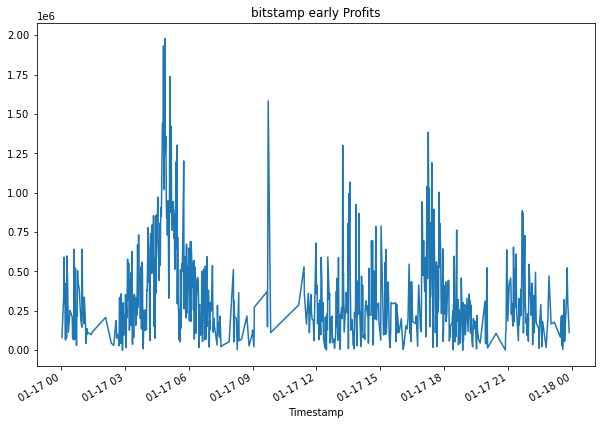

In [59]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="bitstamp early Profits")

In [60]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp Profits'}, xlabel='Timestamp'>

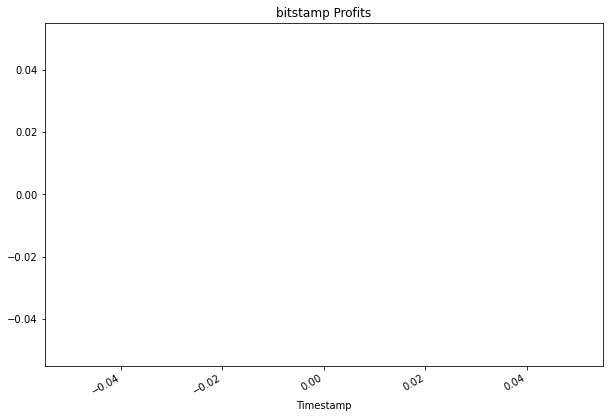

In [61]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title="bitstamp Profits")

In [62]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp late Profits'}, xlabel='Timestamp'>

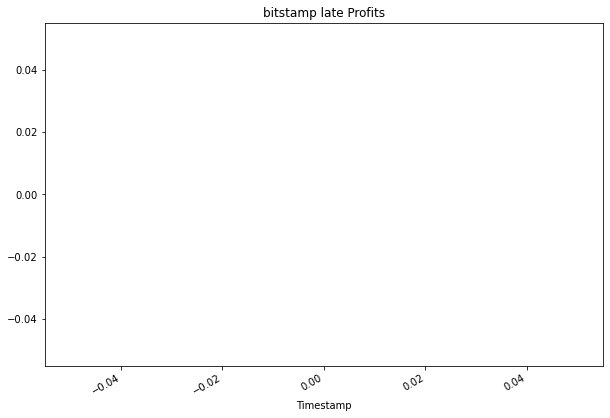

In [63]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 7), title="bitstamp late Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [64]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

259535721.1122

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [65]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-65-b5d43a90cd8b>, line 2)

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE